In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Importing libraries is a critical first step in Exploratory Data Analysis (EDA), as it equips us with essential tools for data handling, visualization, and statistical analysis. In Python, popular libraries like Pandas are used for efficient data manipulation and exploration, allowing us to load and clean datasets easily. Matplotlib and Seaborn are widely used for creating informative visualizations that reveal patterns, trends, and relationships within the data. Additional libraries, like NumPy, aid in numerical operations, especially when dealing with large datasets.

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


This dataset appears to contain diverse health and demographic data potentially useful for predicting diabetes. It includes patient information like Age, Gender, BMI, Blood Pressure, and Glucose Levels, along with lifestyle factors such as Physical Activity, Family History, Smoking Status, and Alcohol Consumption. The target column, Diabetes Status, indicates whether each individual has diabetes. This mix of medical and lifestyle attributes provides a rich foundation for exploring correlations, trends, and risk factors associated with diabetes, as well as for building predictive models aimed at early detection and intervention.

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


The dataset contains 520 rows and 17 columns, with no missing values in any of the columns. This means that the data is complete, and no imputation or handling of missing values is necessary before analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

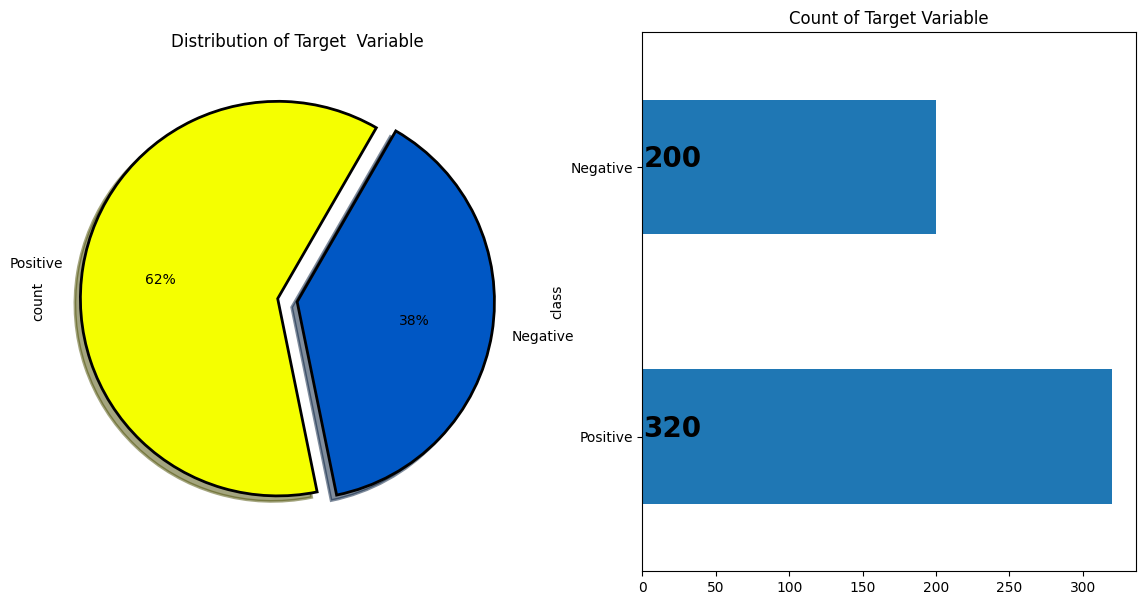

In [ ]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

A pie chart and a horizontal bar plot as subplots to visualize the distribution of the target variable, class, which indicates diabetes presence. In the pie chart, the proportions of Positive and Negative cases are displayed with percentages, distinct colors, and a shadow effect for enhanced clarity. The Positive category is slightly separated (using explode) to emphasize its proportion. The bar plot complements this by showing the exact counts for each class, with bold numerical labels beside each bar for quick reference. This dual visualization provides both a proportionate and count-based view of diabetes outcomes in the dataset.

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


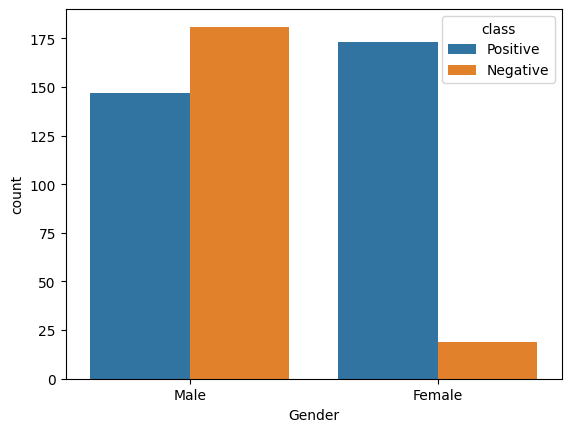

In [ ]:
sns.countplot(x=df['Gender'],hue=df['class'], data=df)

plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

The code visualizes the relationship between Gender and class (diabetes outcome) using two elements.A count plot is generated to show the distribution of Positive and Negative diabetes cases across different genders. This plot highlights any notable differences in diabetes prevalence between male and female participants.

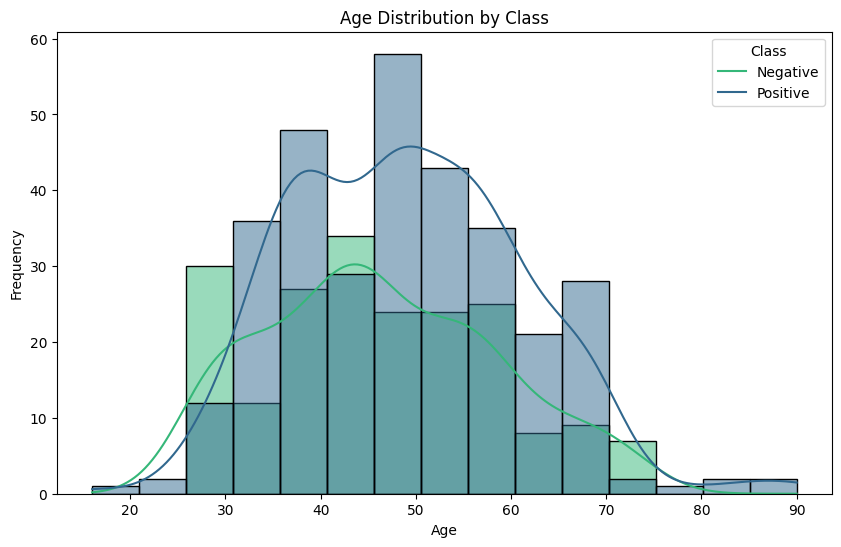

In [ ]:
# Distribution plot for Age and Class

# Set up the figure
plt.figure(figsize=(10, 6))

# Distribution plot for Age colored by Class
sns.histplot(data=df, x='Age', hue='class', kde=True, bins=15, palette='viridis')

# Title and labels
plt.title('Age Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Negative', 'Positive'])

# Show plot
plt.show()


The code produces a histogram displaying the age distribution among Positive and Negative diabetes classes. Using different colors for each class, the plot allows us to observe variations in age distribution between individuals with and without diabetes. The kde (Kernel Density Estimate) overlay adds smooth curves, indicating the general shape of the age distribution for each class, while the histogram bars provide frequency counts within age intervals. The title, axis labels, and legend make it easy to interpret the relationship between age and diabetes status, highlighting any age groups with higher diabetes prevalence.

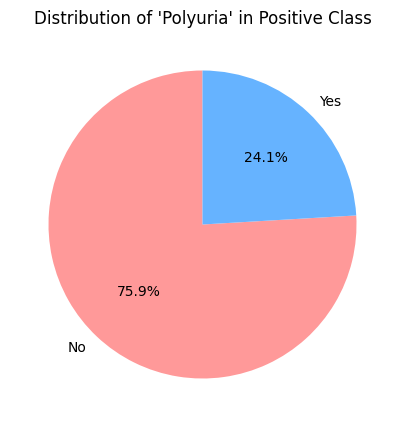

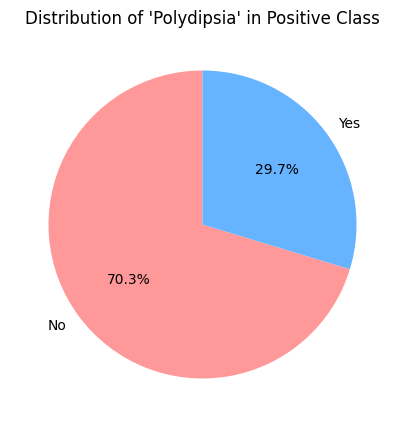

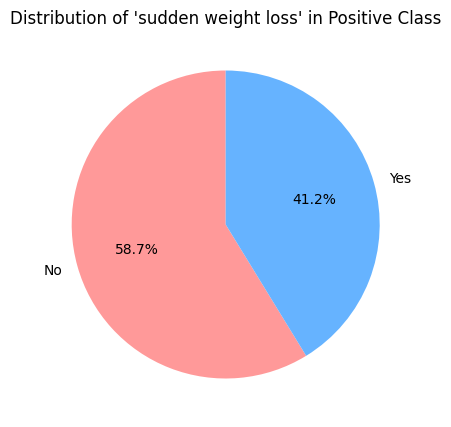

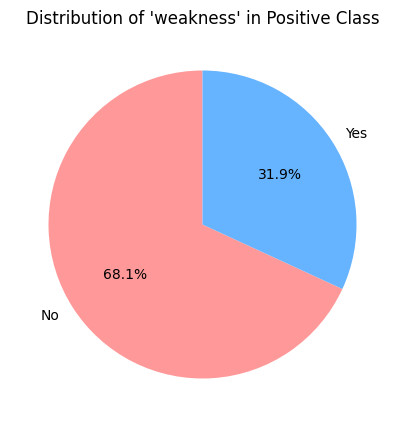

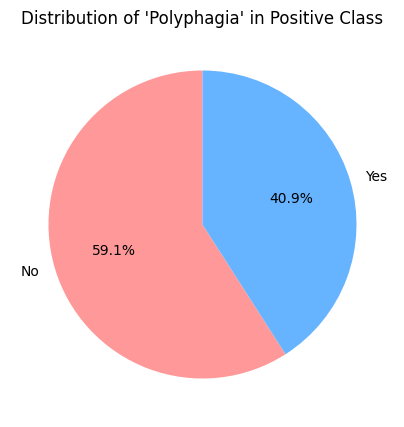

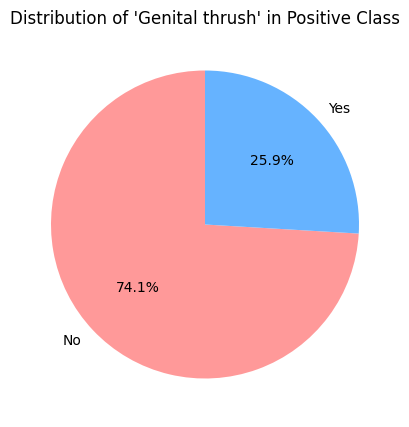

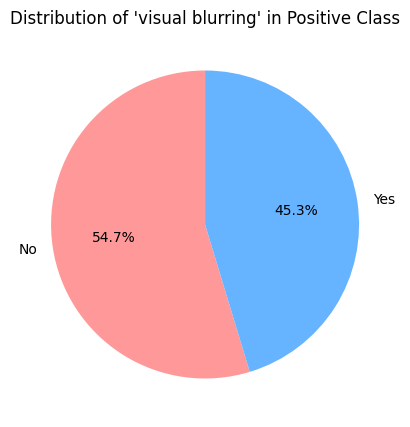

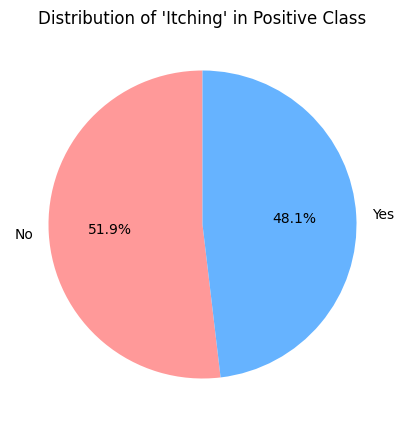

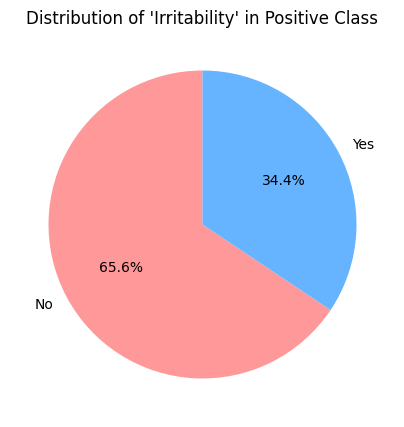

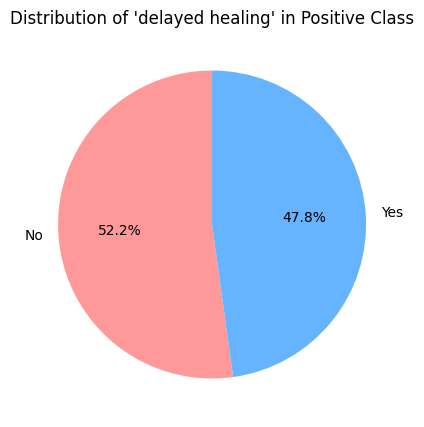

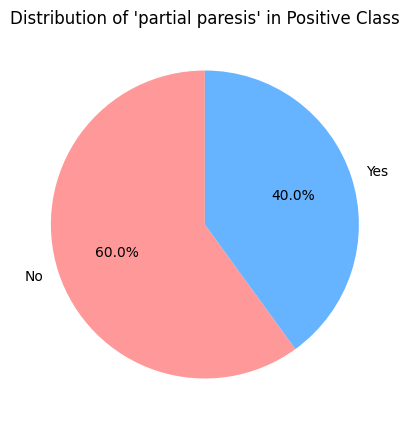

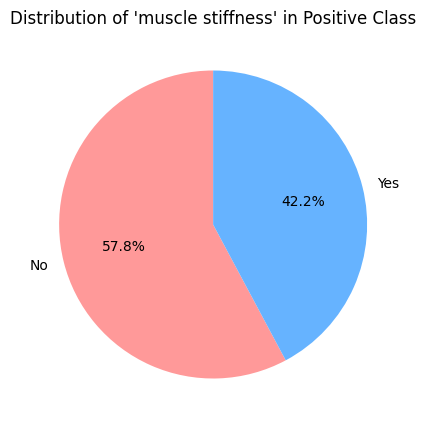

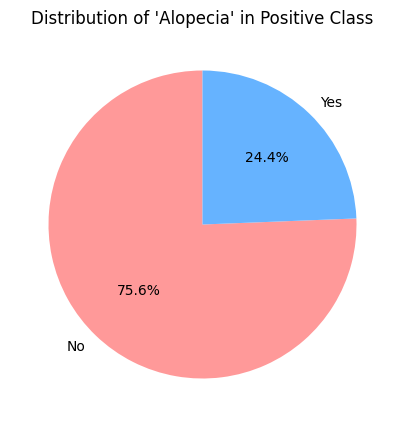

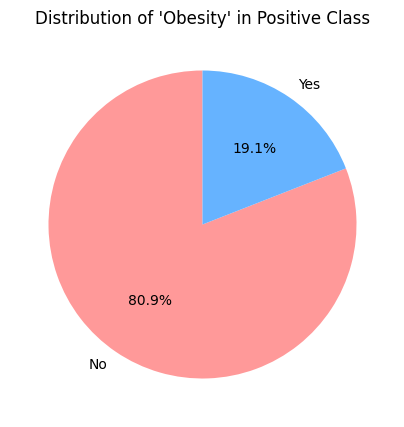

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Yes'/'No' values to binary 1/0 for simplicity
df_binary = df.replace({'Yes': 1, 'No': 0})

# Filter for the "Positive" class
df_positive = df_binary[df_binary['class'] == 'Positive']

# Drop non-binary and unnecessary columns (Age, Gender, and class)
binary_columns = df_positive.drop(columns=['Age', 'Gender', 'class'])

# Plot pie charts for each binary symptom column
for column in binary_columns:
    # Count the occurrences of 0 and 1
    counts = df_positive[column].value_counts()

    # Plot pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title(f"Distribution of '{column}' in Positive Class")
    plt.show()


> This series of pie charts shows the percentage distribution of each symptom (Yes/No) in the Positive class (diabetes diagnosed cases). This helps visually assess which symptoms are more prevalent among individuals with diabetes, offering insights into which symptoms are more commonly associated with positive diabetes diagnoses.

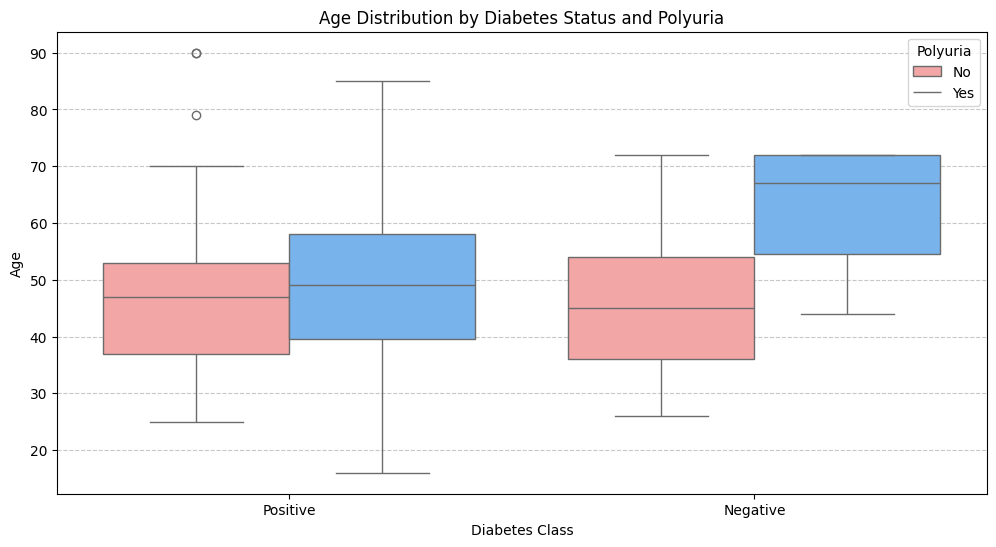

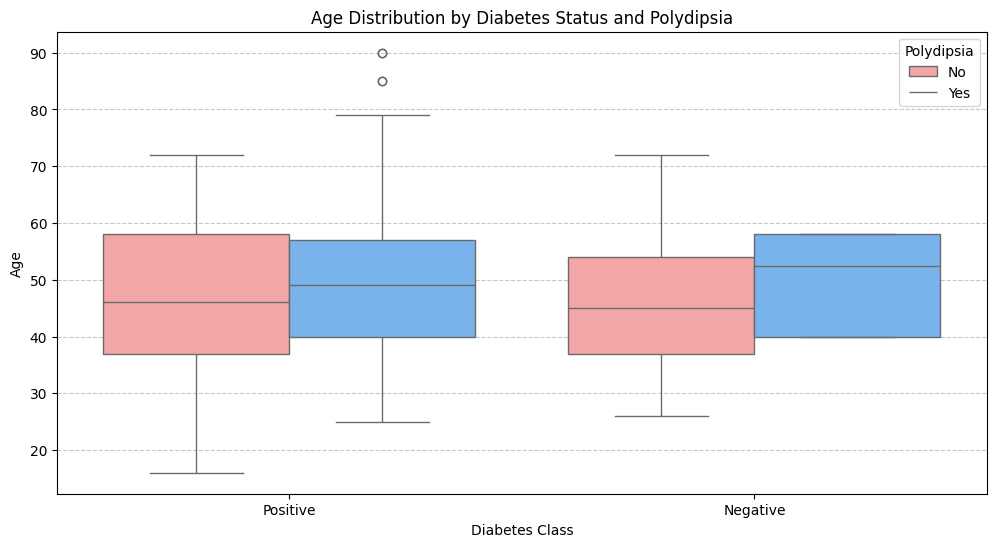

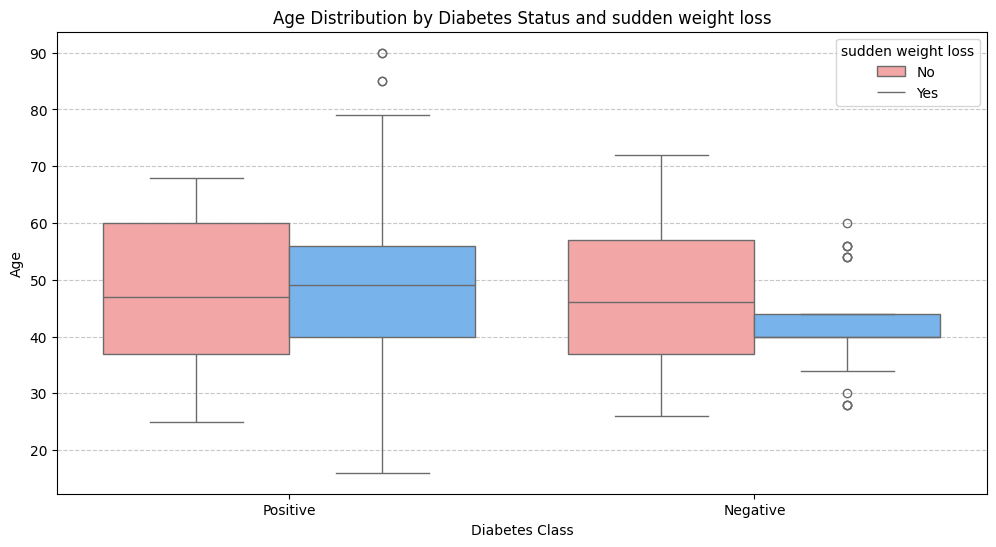

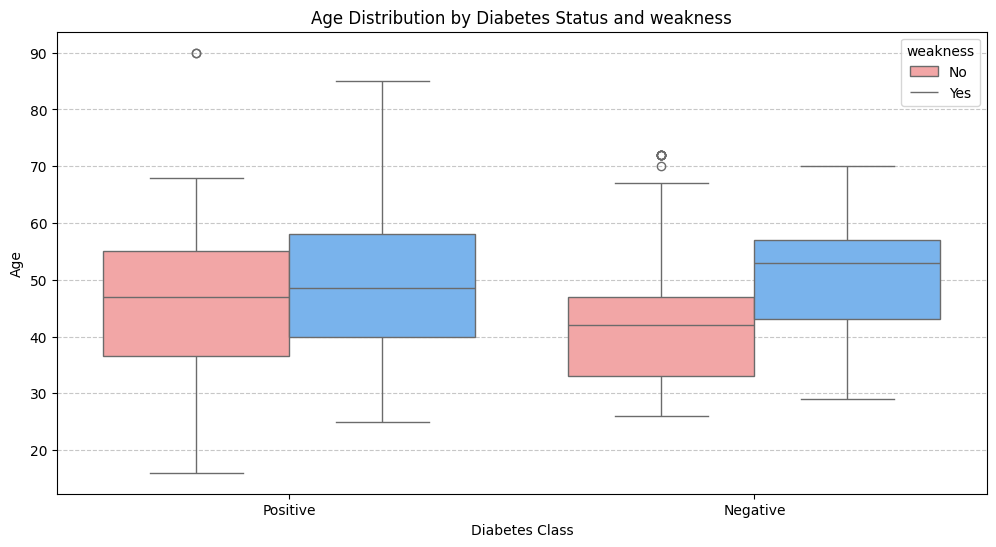

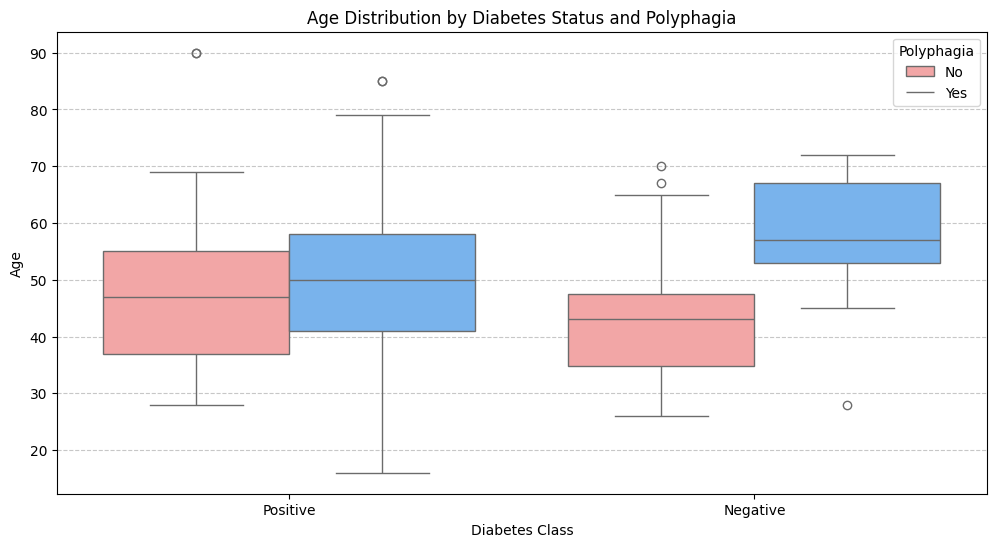

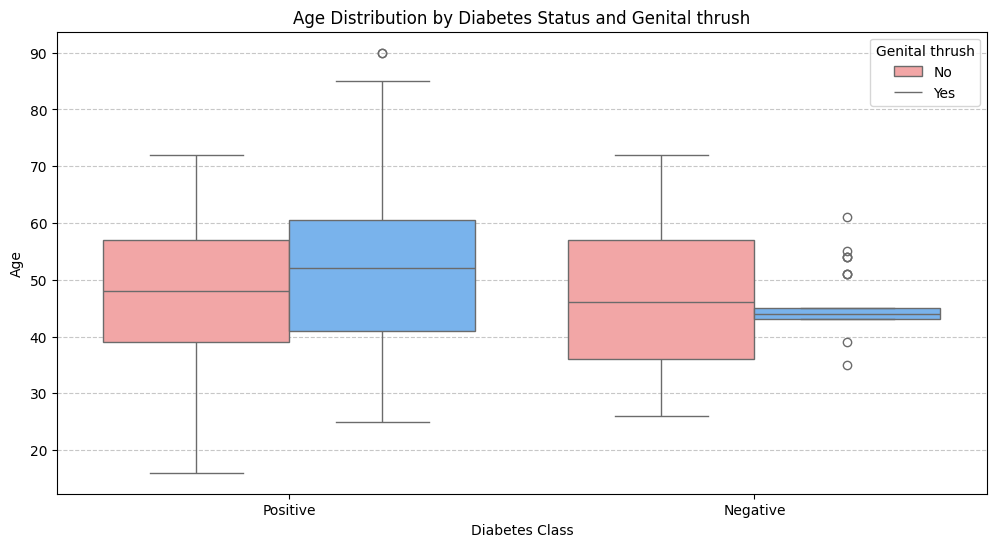

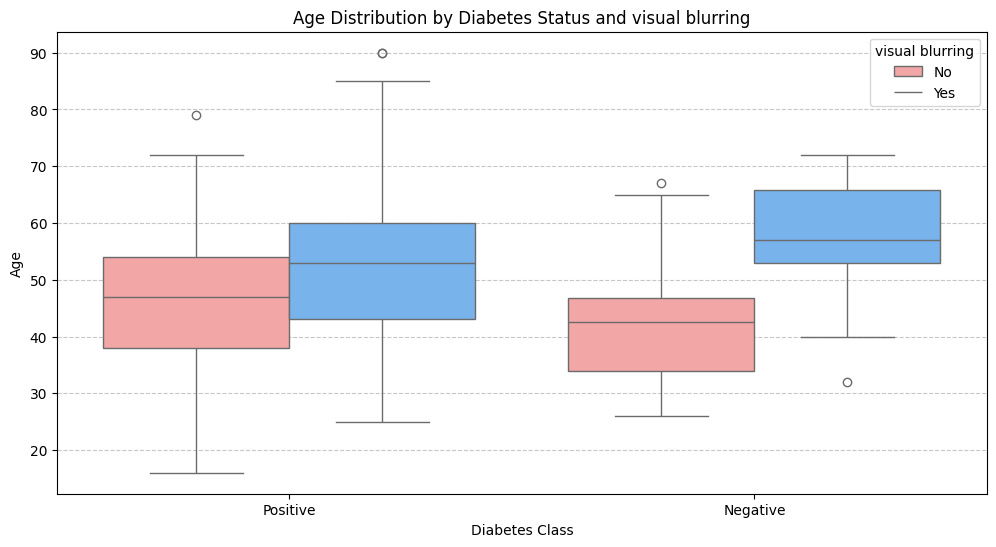

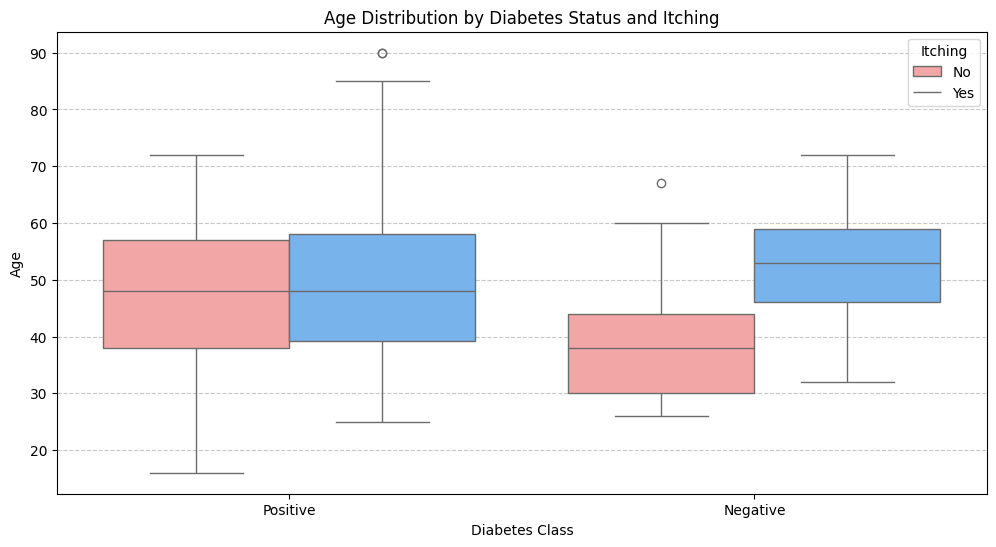

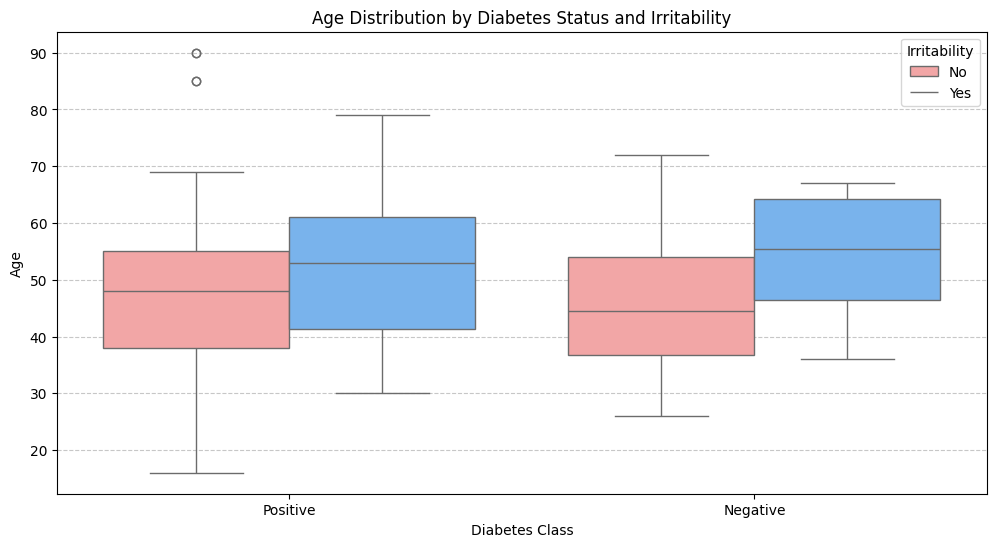

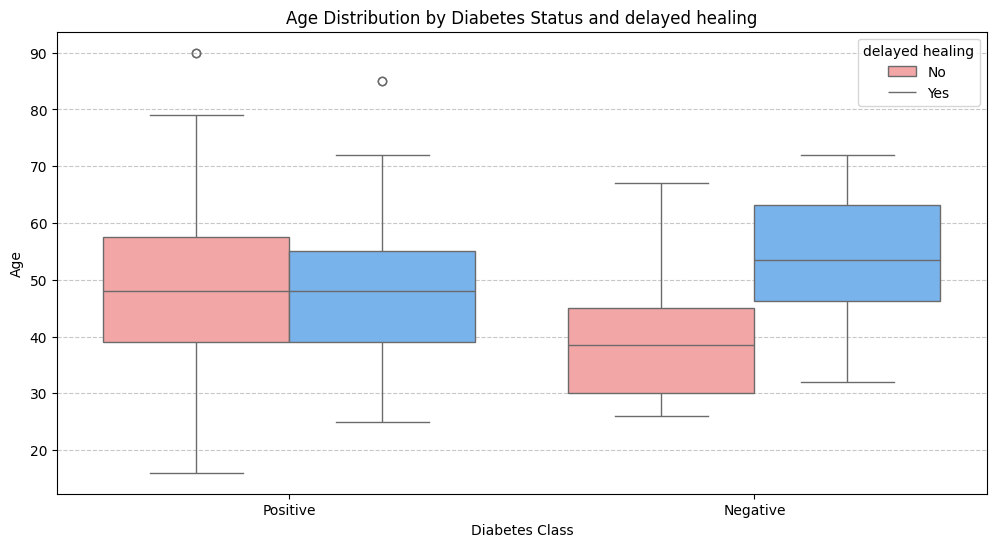

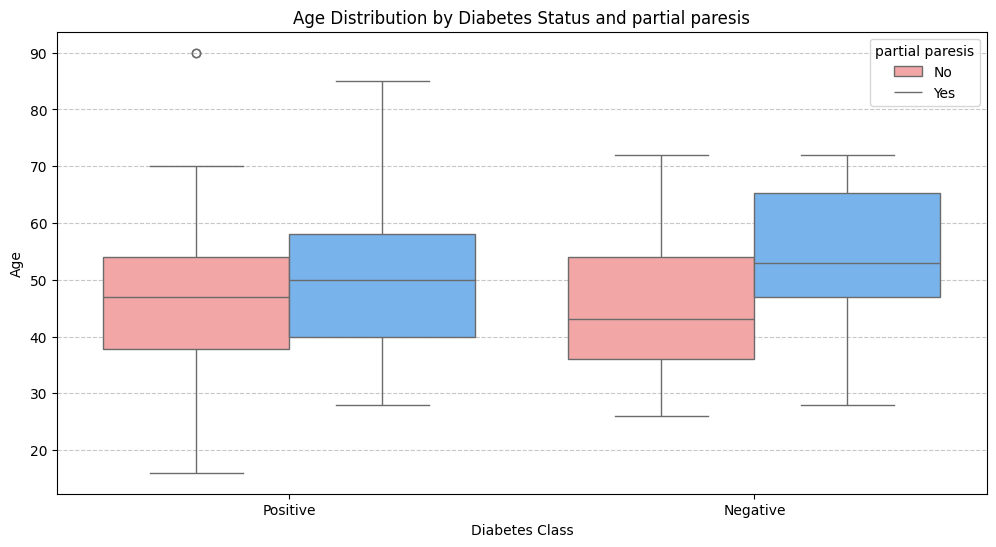

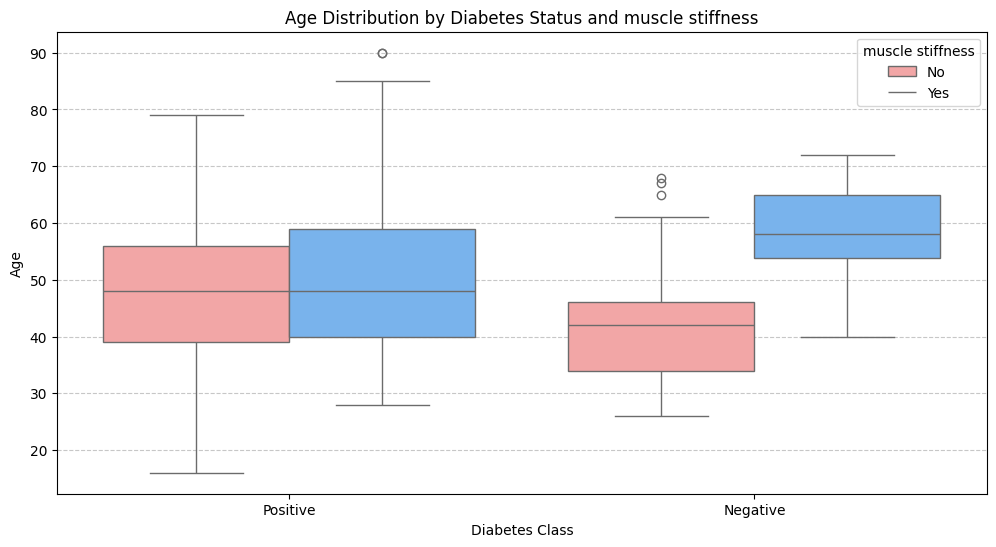

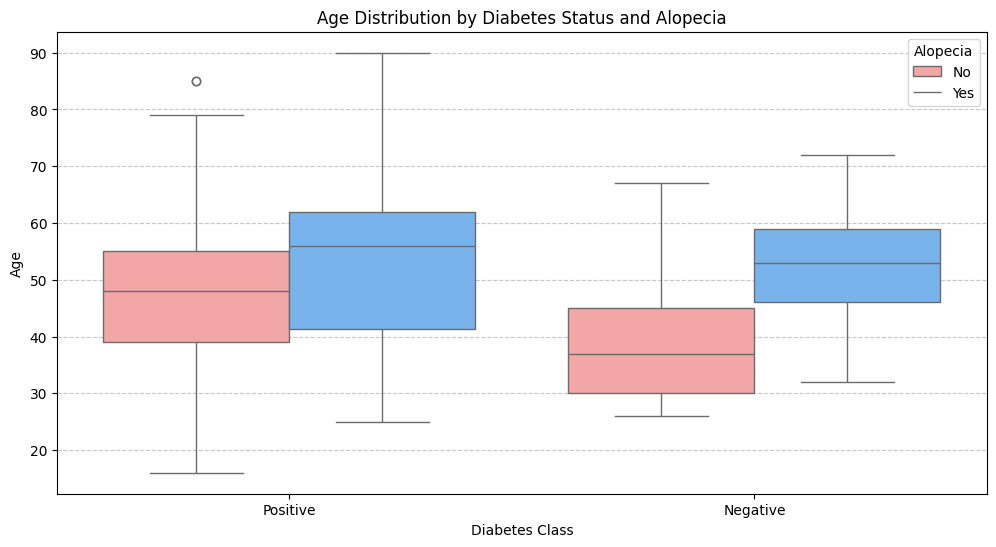

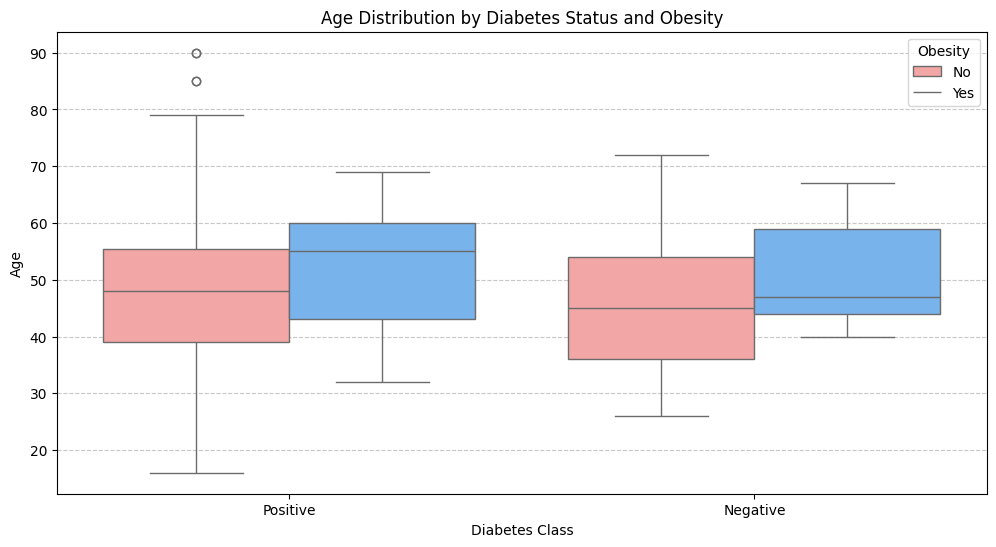

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect symptom columns by excluding 'Age', 'Gender', and 'class'
symptom_columns = [col for col in df.columns if col not in ['Age', 'Gender', 'class']]

# Convert binary Yes/No columns to numeric for easier plotting (Yes=1, No=0)
df_binary = df.replace({'Yes': 1, 'No': 0})

# Loop through each symptom column to create separate box plots
for symptom in symptom_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_binary, x='class', y='Age', hue=symptom, palette=['#ff9999', '#66b3ff'])
    plt.title(f"Age Distribution by Diabetes Status and {symptom}")
    plt.xlabel("Diabetes Class")
    plt.ylabel("Age")
    plt.legend(title=symptom, labels=["No", "Yes"])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()




The code generates a series of box plots to explore the relationship between Age, Diabetes Status (class), and various symptoms. By automatically detecting the symptom columns, each plot displays the age distribution for Positive and Negative diabetes cases, with the data further separated by whether each symptom (e.g., Polyuria, Polydipsia) is present or absent. Converting Yes/No values to numeric (1/0) enables clear, categorical differentiation in the plots. The use of color and a separate legend for each symptom makes it easy to compare age variations across symptoms, highlighting any age-related trends in symptom prevalence among diabetic and non-diabetic individuals.

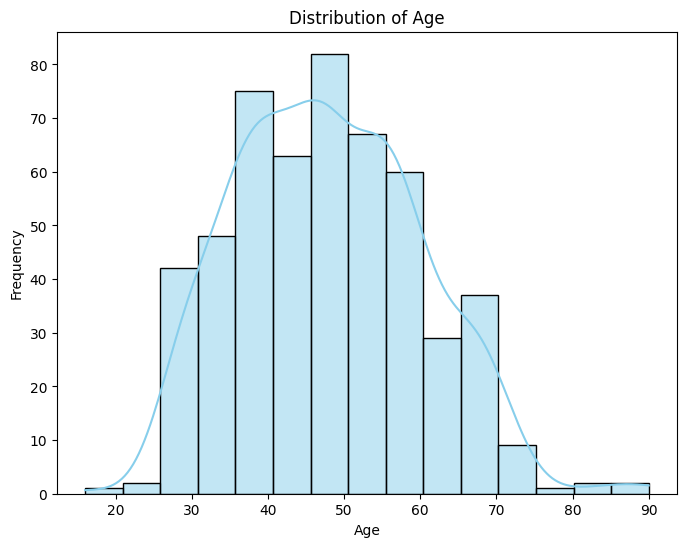

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, bins=15, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



The histogram is to visualize the distribution of ages in the dataset. The plot shows the frequency of different age groups, with a Kernel Density Estimate (KDE) overlay that smooths out the age distribution curve, providing a clearer view of age patterns. The histogram bars, colored in sky blue, show the concentration of individuals across various age intervals, allowing us to identify the most common age ranges within the data. This visualization is helpful for understanding the age demographics of the dataset, which may influence the analysis of age-related trends in diabetes prevalence.

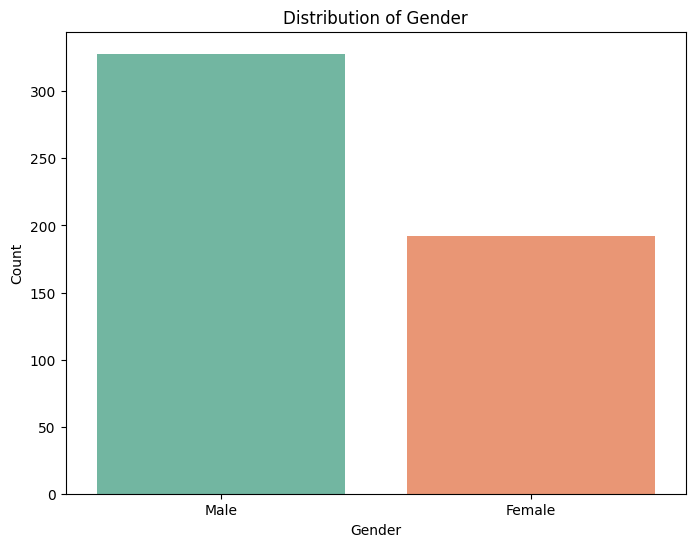

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Gender' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


The distribution plot of the 'Gender' column shows the count of male and female entries in the dataset. The plot reveals whether there is a gender imbalance in the data, with the bar heights representing the number of individuals identified as either male or female. This type of visualization is useful for assessing demographic representation and is helpful in understanding if one gender is overrepresented in the dataset, which could influence analysis outcomes.

In [ ]:
import plotly.express as px

# Convert categorical columns to appropriate types for better plotting
df['Polyuria'] = df['Polyuria'].astype(str)
df['Polydipsia'] = df['Polydipsia'].astype(str)
df['class'] = df['class'].astype(str)
df['Gender'] = df['Gender'].astype(str)

# Create the plot with plotly
fig = px.box(
    df,
    x='class',
    y='Age',
    color='Gender',
    facet_row='Polyuria',
    facet_col='Polydipsia',
    points="all",
    color_discrete_map={"Male": "blue", "Female": "pink"},
    title='Age Distribution by Diabetes Status, Gender, and Additional Symptoms'
)

# Update layout for better readability
fig.update_layout(
    yaxis_title="Age",
    xaxis_title="Class",
    legend_title="Gender"
)

fig.show()


The above box plot visualizes the age distribution by diabetes status (class), gender, and additional symptoms (Polyuria and Polydipsia). Each box represents the age range for individuals in a particular category, divided by whether they have symptoms of polyuria (excessive urination) and polydipsia (excessive thirst). The data points are shown within each box to provide detailed insights into individual ages. Gender is color-coded, with male data points in blue and female in pink. This visualization helps identify trends in age and gender across different symptom categories and diabetes status, revealing whether certain symptoms or age groups correlate with a positive or negative diabetes diagnosis.